In [3]:
#import libraries
from bs4 import BeautifulSoup
import requests
import time
import datetime 
import pandas as pd
import csv
import smtplib  # helps us send email to us
import matplotlib.pyplot as plt
import seaborn as sns

# List of product URLs
product_urls = [
    'https://www.walmart.com/ip/Apple-Watch-Series-10-GPS-42mm-Rose-Gold-Aluminum-Case-with-Plum-Sport-Loop/11394812903?classType=VARIANT',
    'https://www.walmart.com/ip/Michael-Kors-Men-s-Slim-Runway-Black-Dial-Watch-MK8507/806882183?classType=VARIANT&athbdg=L1600&from=/search',
    'https://www.walmart.com/ip/Casio-Women-s-Illuminator-LA680WGA-9-Gold-Metal-Quartz-Fashion-Watch/169102734?classType=REGULAR&from=/search',
    'https://www.walmart.com/ip/MICHAEL-KORS-Stainless-Steel-Silver-Mens-Lexington-Watch-Model-MK8405/360490803?classType=REGULAR&athbdg=L1600&from=/search',
    'https://www.walmart.com/ip/Casio-G-Shock-GA-2100-1A1-GA2100-1A1-World-Time-Quartz-Men-s-Watch/1716340807?classType=REGULAR&from=/search',
    'https://www.walmart.com/ip/Michael-Kors-Bradshaw-Two-Tone-Mens-Watch-MK5976/46359894?classType=REGULAR&athbdg=L1600&from=/search',
    'https://www.walmart.com/ip/Michael-Kors-MK5896-Parker-Round-Adult-Female-Watch/47910234?classType=VARIANT&athbdg=L1600&from=/search'
    # Add at least 10 product URLs here
]

# Function to get product details
def get_product_data(url):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36", 
        "Accept-Encoding":"gzip, deflate", 
        "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", 
        "DNT":"1", "Connection":"close", 
        "Upgrade-Insecure-Requests":"1"
    }

    page = requests.get(url, headers=headers)
    soup1 = BeautifulSoup(page.content, "html.parser")
    soup2 = BeautifulSoup(soup1.prettify(), "html.parser")

    # Extract title and price
    title = soup2.find(id="main-title")
    price = soup2.find("span", {
        "itemprop": "price",
        "data-seo-id": "hero-price",
        "data-fs-element": "price"
    })
    
    # Check if the title and price are found
    if title and price:
        title = title.get_text().strip()
        price = ''.join(filter(lambda c: c.isdigit() or c == '.', price.get_text()))
    else:
        title = "Not Found"
        price = "Not Found"
    
    today = datetime.date.today()
    return title, price, today

# Header for CSV
header = ['Title', 'Price', 'Date']

# Open CSV file and write data
with open('Visualization_ScrapingProject.csv', 'w', newline='', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(header)

# Loop through the product URLs and scrape data
for url in product_urls:
    title, price, today = get_product_data(url)
    
    data = [title, price, today]

    # Append data to CSV
    with open('Visualization_ScrapingProject.csv', 'a+', newline='', encoding='UTF8') as f:
        writer = csv.writer(f)
        writer.writerow(data)
    
    print(f"Scraped data for {title}: {price} on {today}")
    
# Read and display the scraped data
df = pd.read_csv('Visualization_ScrapingProject.csv')
print(df)

# Convert Price to numeric values (in case there are any non-numeric characters)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')







Scraped data for Apple Watch Series 10 GPS 42mm Rose Gold Aluminum Case with Plum Sport Loop: 329.00 on 2025-01-05
Scraped data for Michael Kors Men's Slim Runway Black Dial Watch - MK8507: 74.00 on 2025-01-05
Scraped data for Casio Women's Illuminator LA680WGA-9 Gold Metal Quartz Fashion Watch: 59.00 on 2025-01-05
Scraped data for MICHAEL KORS Stainless Steel Silver Mens Lexington Watch Model MK8405: 110.00 on 2025-01-05
Scraped data for Casio G-Shock GA-2100-1A1 World Time Quartz Men's Watch: 99.00 on 2025-01-05
Scraped data for Michael Kors Men's Bradshaw Two-Tone Chronograph Metal Watch MK5976: 86.00 on 2025-01-05
Scraped data for Michael Kors Women's Parker Two-Tone Watch MK5896: 122.00 on 2025-01-05
                                               Title  Price        Date
0  Apple Watch Series 10 GPS 42mm Rose Gold Alumi...  329.0  2025-01-05
1  Michael Kors Men's Slim Runway Black Dial Watc...   74.0  2025-01-05
2  Casio Women's Illuminator LA680WGA-9 Gold Meta...   59.0  2025-01-

C:\Users\KIRTHIKA K S\AppData\Local\Temp\ipykernel_30376\3061172668.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Ensure labels fit


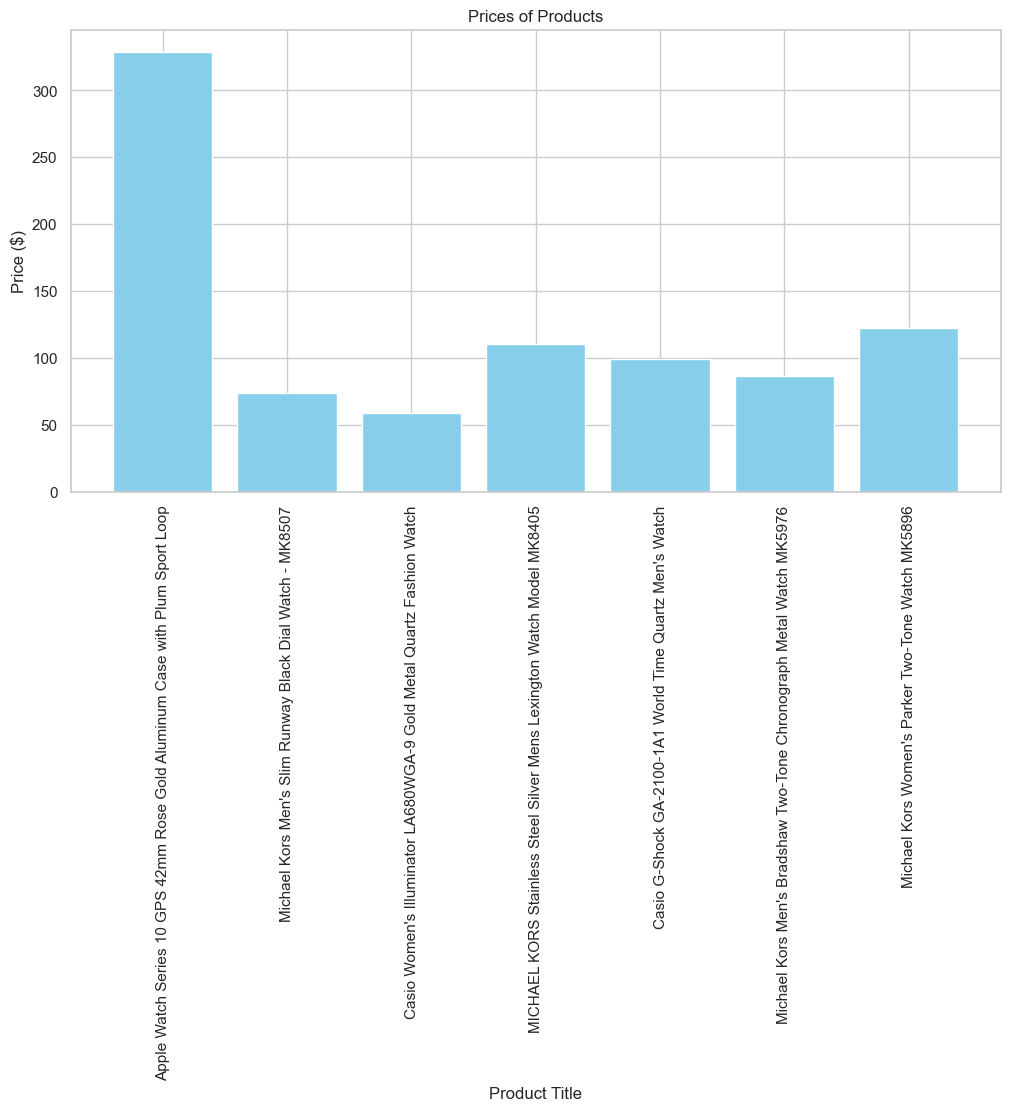

In [4]:
# Data Visualization: Plotting

# Set plot style
sns.set(style="whitegrid")

# 1. Bar plot: Show prices of each product
plt.figure(figsize=(12, 6))
plt.bar(df['Title'], df['Price'], color='skyblue')
plt.title("Prices of Products")
plt.xlabel("Product Title")
plt.ylabel("Price ($)")
plt.xticks(rotation=90)
plt.tight_layout()  # Ensure labels fit
plt.show()

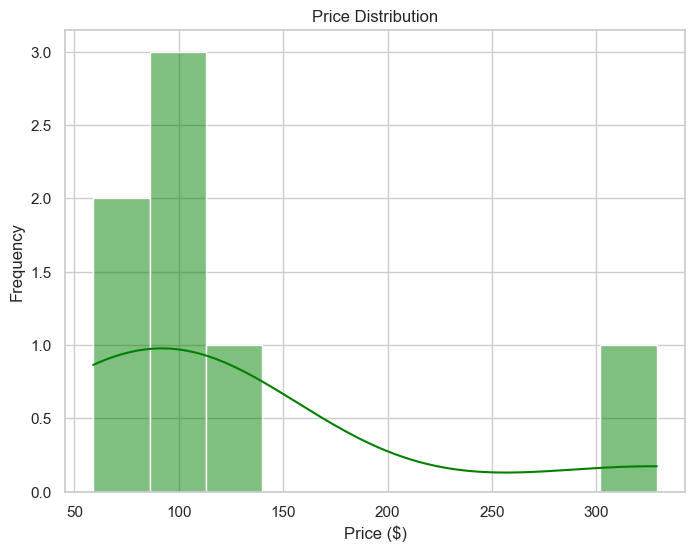

In [5]:
# 2. Price Distribution (Histogram)
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], bins=10, kde=True, color='green')
plt.title("Price Distribution")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()

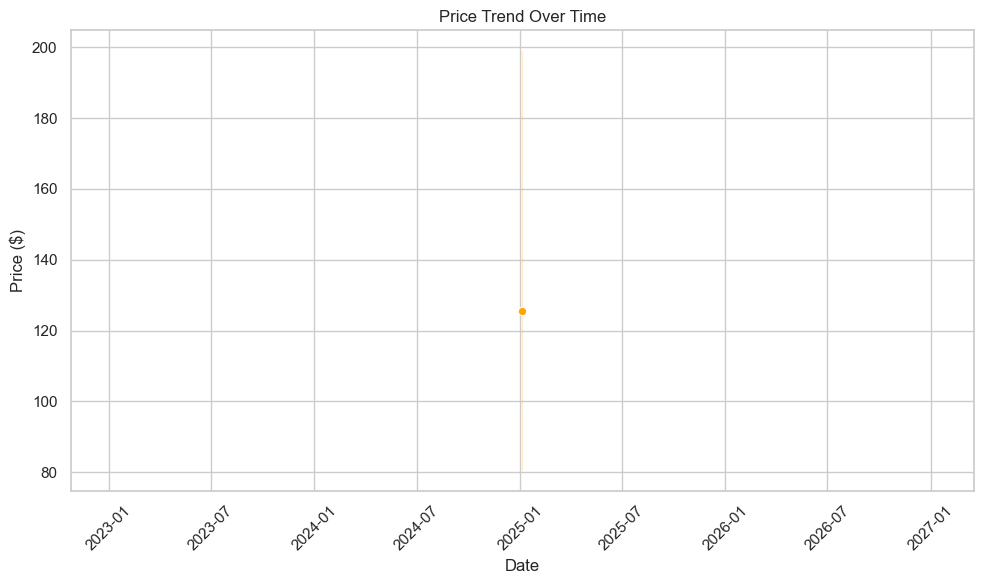

In [6]:
# 3. If we have multiple dates, we could track price trends over time (time series plot)
# Let's create a time series plot (if there are multiple dates)
df['Date'] = pd.to_datetime(df['Date'])

# If you have multiple dates scraped, this plot will show the price trend over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Date', y='Price', marker='o', color='orange')
plt.title("Price Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
